In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
from scipy import spatial
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


plt.rcParams['figure.figsize'] = 16,5

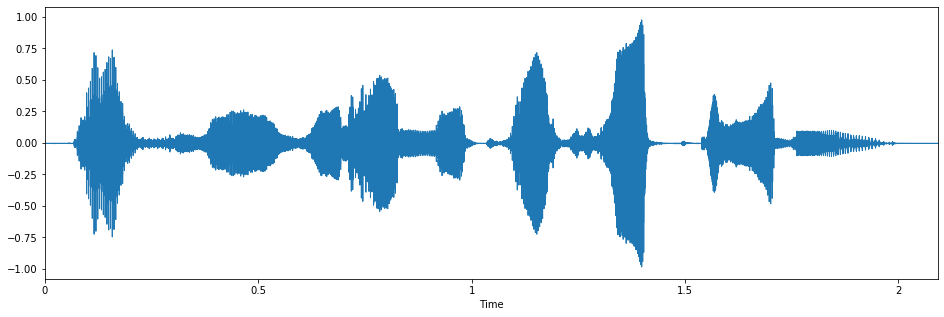

(91,)

In [3]:
mylist= os.listdir('EMO-DB/Female')
x, sr = librosa.load('EMO-DB/Female/angry40.wav')
sample_rate_test = np.array(sr)
mfccs_test = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate_test, n_mfcc=13), axis=0)
feature_test = mfccs_test
librosa.display.waveplot(x, sr=sr)
plt.show()

'''
feature_test.shape
    SHAPE TESS:  91

feature_test.shape
    SHAPE RAVDESS:  110

feature_test.shape
    SHAPE EMO-DB: 91

'''

COSINE SEMETRY:  0.9041958451271057


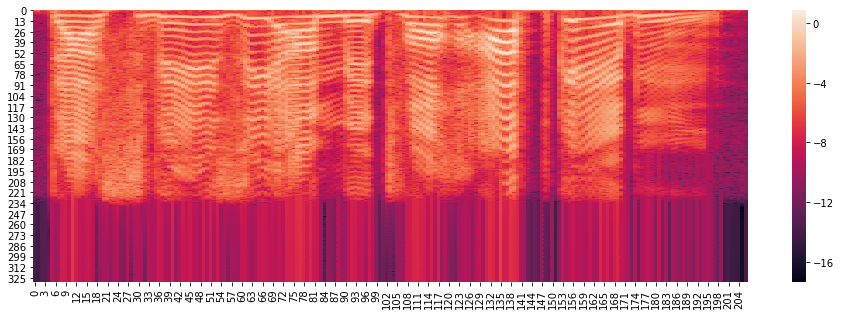

In [4]:
nstep = int(sr * 0.01)  # 10 ms step
nwin  = int(sr * 0.03)  # 30 ms window
nfft = nwin             # Number of Radix-2-FFT == Number of window used

window= np.hamming(nwin)   # Window co-efficients of size nwin
nn = range(nwin, len(x), nstep)
X_FFT = np.zeros( (len(nn), nfft//2) )
X_MFCC = []

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]                        # Windows x[n1:n2] || n2-n1= nwin  [661]
    z= np.fft.fft(window * xseg, nfft, norm='ortho')       # arg1: segmented value  ||  arg2: fft size  [661]
    X_FFT[i,:]= np.log(np.abs(z[:nfft//2]))      # nfft//2= 330   ||  Fitting in an array
    X_MFCC_librosa_dct3= librosa.feature.mfcc(window * xseg, dct_type=3)
    X_MFCC_librosa_dct2= librosa.feature.mfcc(window * xseg, dct_type=2)
    # X_MFCC_PSF= psf.mfcc(window * xseg)

cosine_semetry= 1-spatial.distance.cosine(X_MFCC_librosa_dct2[:,0], X_MFCC_librosa_dct3[:,0])
print("COSINE SEMETRY: ",cosine_semetry)
sns.heatmap(X_FFT.T)
plt.show()

In [29]:
feeling=[]
for i in range(0,32):
    feeling.append('angry')
for i in range(0,32):
    feeling.append('bored')
for i in range(0,32):
    feeling.append('disgust')
for i in range(0,32):
    feeling.append('fear')
for i in range(0,32):
    feeling.append('happy')
for i in range(0,32):
    feeling.append('neutral')
for i in range(0,32):
    feeling.append('sad')
labels = pd.DataFrame(feeling)

In [30]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index, y in enumerate(np.unique(feeling)):
    for i in range(0, 32):
        X, sr = librosa.load('EMO-DB/Female/'+ y + str(i) +'.wav', res_type='kaiser_fast', duration=2, sr=22050*2, offset=0.5)
        sample_rate = np.array(sr)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13, dct_type=2), axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [31]:
df3 = pd.DataFrame(df['feature'].values.tolist())
df3= df3.iloc[:, :105]
newdf= pd.concat([df3, labels], axis=1)
newdf= newdf.rename(index=str, columns={"0": "label"})
newdf= shuffle(newdf)
newdf= newdf.fillna(0)

newdf.to_csv('EMO-DB/Processed_MFCCS_Female.csv')

In [32]:
newdf

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,0
75,-2.931116,-1.788413,-1.573208,-0.732614,-0.515941,-0.609692,-1.079842,-1.283444,0.112016,0.838804,...,-3.946695,-4.745380,-6.268566,-7.952695,-12.509345,-11.728794,-10.939133,-4.965978,-4.103018,disgust
115,-17.898685,-19.763731,-19.613070,-16.363075,-14.605036,-15.401322,-17.003822,-17.231133,-18.760246,-19.028149,...,-22.314344,-21.200911,-23.663588,-11.139734,-7.734277,-11.577356,-19.191006,-23.290068,-23.707258,fear
147,-14.519226,-16.367619,-19.500391,-19.109941,-18.910980,-17.644749,-9.787818,-5.916027,-9.181393,-11.996960,...,-4.154979,-10.990374,-15.897078,-19.178959,-21.192539,-14.347363,-8.972260,-10.892666,-16.017050,happy
72,4.825710,1.575766,-7.000210,-6.204372,-6.622987,-7.134799,-6.583521,-5.320223,-6.221967,-4.443687,...,-19.229107,-22.188375,-23.446260,-23.978426,-26.035347,-25.613981,-24.094627,-23.931673,-16.143330,disgust
145,-15.305298,-17.113741,-16.310375,-15.587900,-17.303438,-15.998632,-13.634383,-14.643027,-17.497892,-19.565891,...,-19.653767,-20.214750,-20.333042,-19.779623,-19.062910,-19.420578,-21.872713,-25.302877,-29.659090,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,-19.417156,-10.792476,-5.795163,-4.335229,-5.620867,-5.552387,-7.285505,-10.069456,-12.317945,-10.377587,...,-9.762025,-4.049802,-2.441325,-4.719721,-6.414981,-4.638997,-3.729831,-3.576658,-5.995874,bored
148,-31.525320,-28.328186,-18.785574,-9.296639,-4.728031,-4.372809,-6.203529,-7.747185,-7.684431,-7.041707,...,-19.459049,-19.853947,-20.237194,-20.457798,-22.820530,-23.585545,-23.901035,-24.537153,-23.959358,happy
12,-13.674546,-17.390705,-27.964893,-32.346634,-28.387522,-27.544149,-27.026609,-29.708986,-29.936832,-33.595798,...,-36.002354,-40.438240,-41.988918,-42.451054,-41.381889,-42.351177,-42.265976,-44.297279,0.000000,angry
62,-10.064816,-10.824934,-11.971331,-11.831604,-7.680962,-6.618414,-10.338480,-18.367807,-13.969741,-6.506825,...,-6.218468,-8.796891,-10.699868,-10.748949,-9.686152,-8.612167,-8.264154,-8.573382,-9.117507,bored
